Import Data

In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics.pairwise import cosine_similarity
rating_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
rating_df = pd.read_csv(rating_url)

rating_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [4]:
rating_df.shape

(233306, 3)

In [3]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233306 entries, 0 to 233305
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    233306 non-null  int64  
 1   item    233306 non-null  object 
 2   rating  233306 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.3+ MB


In [6]:
#convert dataset to matrix user-item form
rating_sparse_df = rating_df.pivot(index='user', columns='item',
                                   values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df = rating_sparse_df.set_index('user')
rating_sparse_df.head()

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
user,,,,,,,,,,,,,,,,,,,,,
2,0.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,...,0.0,2.0,0.0,3.0,0.0,2.0,2.0,0.0,3.0,0.0
4,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0
5,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
rating_sparse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33901 entries, 2 to 2103039
Columns: 126 entries, AI0111EN to WA0103EN
dtypes: float64(126)
memory usage: 32.8 MB


Using Cosine Similarity between each item


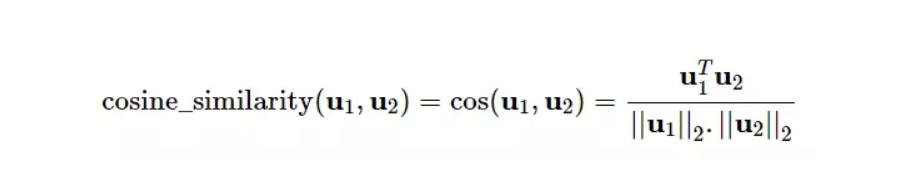

In [ ]:
train_set2 = rating_sparse_df.copy()

In [ ]:
item_similarity = cosine_similarity(train_set2.T)
item_similarity.shape

(126, 126)

In [ ]:
item_sim_df = pd.DataFrame(item_similarity,index=train_set2.columns,columns = train_set2.columns)

In [ ]:
#Items have similarity with 'AI0111EN' equal to 0

array1 = item_sim_df.loc['AI0111EN', item_sim_df.loc['AI0111EN'] == 0]
print(array1)
print(len(array1))

BD0153EN      0.0
BENTEST4      0.0
CB0201EN      0.0
DA0201EN      0.0
DB0111EN      0.0
DS0107        0.0
DX0106EN      0.0
DX0107EN      0.0
DX0108EN      0.0
GPXX0QR3EN    0.0
GPXX0T0FEN    0.0
PA0103EN      0.0
PA0107EN      0.0
PA0109EN      0.0
RAVSCTEST1    0.0
RP0151EN      0.0
Name: AI0111EN, dtype: float64
16


In [ ]:
array = item_sim_df.apply(pd.Series.value_counts).loc[0]
print(f'Number of item similarity points equal to 0: {int(array.sum())}')

Number of item similarity points equal to 0: 3262


Filling column based on similarity between each item (take highest to lower similarity)

In [ ]:
def get_similar_course(course_name):
  similar_course = item_sim_df[course_name]
  similar_course = similar_course.sort_values(ascending=False)
  return similar_course[1:2] #change this number to align datapoints

In [ ]:
#Take any item which have no similarity with any feature
for i in train_set2.columns:
  array2 = get_similar_course(i)
  if array2.sum() == 0:
    print(array2)

AI0111EN    0.0
Name: BENTEST4, dtype: float64


In [ ]:
#Top 5 highest similarity with course 'AI0111EN'

get_similar_course('AI0111EN')

ML0201EN    0.173505
Name: AI0111EN, dtype: float64

In [ ]:
def fill_col(course):
    sim = get_similar_course(course)
    for i in train_set2.index:
      if train_set2.loc[i,course] == 0:
        for j in sim.index:
          if train_set2.loc[i,j] != 0:
            train_set2.loc[i,course] = train_set2.loc[i,j]
            break
          else:
            continue

In [ ]:
for i in train_set2.columns:
  fill_col(i)

In [ ]:
item_similarity2 = cosine_similarity(train_set2.T)

In [ ]:
item_sim_df2 = pd.DataFrame(item_similarity2,index=train_set2.columns,columns = train_set2.columns)

In [ ]:
#Check number of items have similarity with item 'AI0111EN' equal to 0

item_sim_df2.loc['AI0111EN', item_sim_df2.loc['AI0111EN'] == 0]

DX0106EN    0.0
DX0107EN    0.0
DX0108EN    0.0
PA0103EN    0.0
PA0107EN    0.0
PA0109EN    0.0
Name: AI0111EN, dtype: float64

In [ ]:
try:
  array = item_sim_df2.apply(pd.Series.value_counts).loc[0]
  print(f'Number of item similarity points equal to 0: {int(array.sum())}')
except KeyError:
  print(f'Number of item similarity points equal to 0: 0')

Number of item similarity points equal to 0: 1526


Count number of filled and unfilled data points

In [ ]:
array = train_set2.apply(pd.Series.value_counts).loc[0]
array.sum()

3716496.0

In [ ]:
proportion =100-round(array.sum()/4271526,4)*100
print(f'Protion of filled data: {proportion} %')

Protion of filled data: 12.989999999999995 %


In [ ]:
train_set2

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
user,,,,,,,,,,,,,,,,,,,,,
2,0.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,...,0.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0,3.0,3.0
4,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0
5,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102054,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2102356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2102680,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(train_set2.loc[train_set2['AI0111EN'] == 0,'AI0111EN'])

33067

In [ ]:
train_set2['AI0111EN'].sum()

2500.0

In [ ]:
train_set2

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
user,,,,,,,,,,,,,,,,,,,,,
2,0.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,...,0.0,2.0,2.0,3.0,0.0,2.0,2.0,0.0,3.0,3.0
4,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0
5,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102054,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2102356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2102680,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Fill data with item-item based method:

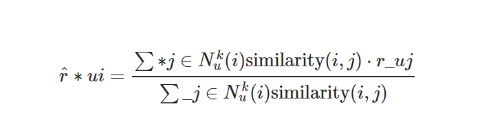



*   r_uj : rating of user u for item j
*   N(i)similarity(i,j): cosine similartiy between item i and item j
*   k: number of k nearest neighbors with item i





In [ ]:
item_similarity4 = cosine_similarity(train_set2.T)
item_sim_df4 = pd.DataFrame(item_similarity4,index=train_set2.columns,columns = train_set2.columns)
item_sim_df4

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
AI0111EN,1.000000,0.186597,0.187849,0.190139,0.128117,0.128119,0.082236,0.067354,0.077697,0.074289,...,0.599318,0.020782,0.135566,0.020775,0.016334,0.049886,0.003772,0.012814,0.129266,0.009716
BC0101EN,0.186597,1.000000,0.984111,0.983183,0.596802,0.596772,0.277024,0.229639,0.250600,0.248501,...,0.208038,0.135837,0.696363,0.135879,0.007126,0.114302,0.004937,0.009084,0.606705,0.021674
BC0201EN,0.187849,0.984111,1.000000,0.999009,0.590986,0.590957,0.273973,0.227648,0.248675,0.246449,...,0.208146,0.134008,0.688875,0.134049,0.007022,0.113556,0.004865,0.008951,0.600974,0.021356
BC0202EN,0.190139,0.983183,0.999009,1.000000,0.591528,0.591498,0.274199,0.227943,0.249376,0.246819,...,0.210133,0.134428,0.688934,0.134469,0.007014,0.114187,0.004860,0.008942,0.601544,0.021333
BD0101EN,0.128117,0.596802,0.590986,0.591528,1.000000,0.999974,0.507822,0.450742,0.460650,0.472887,...,0.156156,0.197164,0.611709,0.197195,0.007722,0.207081,0.010700,0.009843,0.982847,0.080159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMP0105EN,0.049886,0.114302,0.113556,0.114187,0.207081,0.207030,0.357812,0.360014,0.372418,0.377675,...,0.059722,0.107771,0.104718,0.107958,0.028609,1.000000,0.029732,0.011222,0.206813,0.060386
TMP0106,0.003772,0.004937,0.004865,0.004860,0.010700,0.010254,0.016353,0.009121,0.010211,0.013499,...,0.000000,0.015930,0.006649,0.017695,0.115470,0.029732,1.000000,0.090582,0.010516,0.064254
TMP107,0.012814,0.009084,0.008951,0.008942,0.009843,0.009844,0.000000,0.000000,0.018787,0.000000,...,0.000000,0.012025,0.009472,0.012021,0.392232,0.011222,0.090582,1.000000,0.009675,0.030105
WA0101EN,0.129266,0.606705,0.600974,0.601544,0.982847,0.982821,0.501221,0.445094,0.456076,0.467151,...,0.160904,0.212890,0.623765,0.212915,0.007589,0.206813,0.010516,0.009675,1.000000,0.087085


In [ ]:
bxh = item_sim_df4['AI0111EN'][1:3]
bxh['BC0101EN']

0.18659730160502863

In [ ]:
def fill_row2(course_name,k): #this is function that implement item-item method based on K nearest neighbours
  for i in train_set2.index:
      bxh = item_sim_df4[course_name][1:k+1]
      sum1 = 0
      sum2 = 0
      for j in bxh.index:
        sum1 += bxh[j]*train_set2.loc[i,j]
        sum2 += abs(bxh[j])
      if train_set2.loc[i, course_name] == 0:
        train_set2.loc[i,course_name] = sum1/sum2


In [ ]:
#fill column with item - item formula
for i in train_set2.columns:
  fill_row2(i,4)

In [ ]:
array = train_set2.apply(pd.Series.value_counts).loc[0]
print(f'Number of unfilled values :{array.sum()}')

Number of unfilled values :1179236.0


In [ ]:
proportion =100-round(array.sum()/4271526,4)*100
print(f'Protion of filled data: {proportion} %')

Protion of filled data: 72.39 %


In [ ]:
train_set2

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
user,,,,,,,,,,,,,,,,,,,,,
2,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000
4,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
5,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.369904,0.334897,0.422916,0.541402,2.000000,2.000000,1.029797,1.054669,1.029857,1.042972,...,0.746068,0.946522,0.789668,0.946470,0.851578,1.023968,1.093827,0.851578,2.000000,1.301930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102054,0.823467,0.827573,1.066407,3.000000,1.042959,1.418213,1.405577,1.396815,1.406718,1.401323,...,1.517495,1.436959,3.000000,1.436978,1.470773,1.409927,1.380530,1.470773,1.422843,1.303007
2102356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2102680,2.445144,3.000000,3.000000,3.000000,1.920598,2.611624,2.588795,2.571704,2.588831,2.579770,...,2.784587,2.646148,3.000000,2.646184,2.711441,2.592946,2.544620,2.711441,2.620036,2.401313


In [ ]:
def normalize_data():
  for i in train_set2.columns:
    avg = train_set2[i].sum()/(len(train_set2.index)-len(train_set2.loc[train_set2[i]==0,i]))
    for j in train_set2.index:
      if train_set2.loc[j,i] != 0 and train_set2.loc[j,i] != 3 and train_set2.loc[j,i] != 2:
        if train_set2.loc[j,i] > avg:
          train_set2.loc[j,i] = 3
        elif train_set2.loc[j,i] < avg:
          train_set2.loc[j,i] = 2
normalize_data()

In [ ]:
train_set2

,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
user,,,,,,,,,,,,,,,,,,,,,
2,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102054,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2102356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2102680,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0
